### (Optional) Colab Setup
If you aren't using Colab, you can delete the following code cell. Replace the path below with the path in your Google Drive to the uploaded assignment folder. Mounting to Google Drive will allow you access the other .py files in the assignment folder and save outputs to this folder

In [1]:
# you will be prompted with a window asking to grant permissions
# click connect to google drive, choose your account, and click allow
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# TODO: fill in the path in your Google Drive in the string below
# Note: do not escape slashes or spaces in the path string
import os
datadir = "/content/drive/My Drive/CS444/Course Project/"
if not os.path.exists(datadir):
  !ln -s "/content/drive/My Drive/CS444/Course Project/" $datadir
os.chdir(datadir)
!pwd

/content/drive/My Drive/CS444/Course Project


In [3]:
from collections import OrderedDict

import numpy as np
import random

import torch
from torch.nn import functional as F
import torchvision.transforms as transforms

from PIL import Image

In [4]:
# Define the path to the image file
image_path = "0014_out.jpg"

# Load the image from file
img = Image.open(image_path)

# Define the transformation to apply to the image (e.g., resizing, normalization, etc.)
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Apply the transformation to the image
img = transform(img)

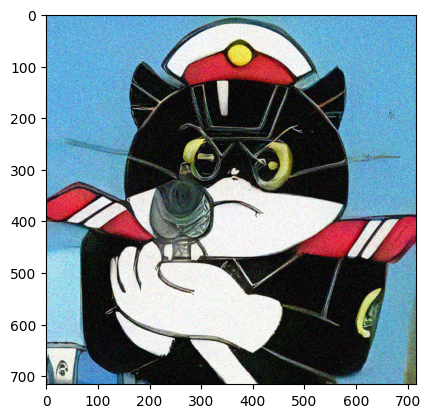

In [5]:
# Add random noise to the image
noise = torch.randn(img.size()) * 0.1
noisy_img = img + noise

# Display the noisy image
import matplotlib.pyplot as plt
plt.imshow(noisy_img.permute(1, 2, 0))
plt.show()

# Convert the noisy tensor image back to a Pillow image and save it to the output directory
noisy_image = transforms.functional.to_pil_image(noisy_img)
noisy_image.save(os.path.join(datadir, "noisy_image2.png"))


Adding gaussian noise

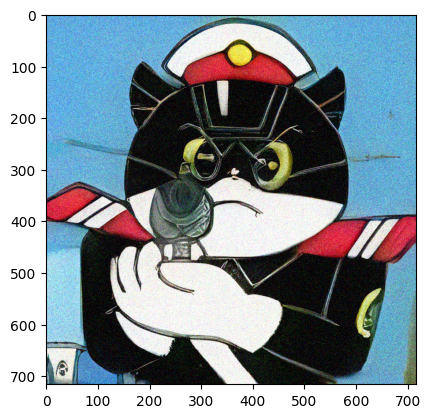

In [7]:
# Add gaussian noise to the image
mean = 0
var = 0.01
sigma = var**0.5

gauss = np.random.normal(mean,sigma,img.size())
gauss = gauss.reshape(img.size())
noisy_img = img + gauss

# Display the noisy image
import matplotlib.pyplot as plt
plt.imshow(noisy_img.permute(1, 2, 0))
plt.show()

# Convert the noisy tensor image back to a Pillow image and save it to the output directory
noisy_image = transforms.functional.to_pil_image(noisy_img)
noisy_image.save(os.path.join(datadir, "noisy_image_gaussian.png"))


Adding Poisson noise

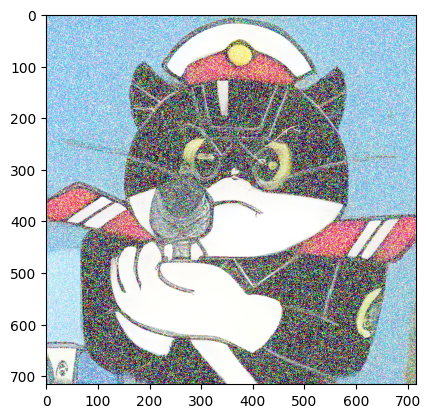

In [8]:
# Add gaussian noise to the image
img_mean = img.mean()

poisson_dist  = torch.distributions.poisson.Poisson(img_mean)
noise         = poisson_dist.sample(img.shape)

noise = noise.numpy()
noise = (noise / np.max(noise)) * 255
noisy_img = img + noise

# Display the noisy image
import matplotlib.pyplot as plt
plt.imshow(noisy_img.permute(1, 2, 0))
plt.show()

# Convert the noisy tensor image back to a Pillow image and save it to the output directory
noisy_image = transforms.functional.to_pil_image(noisy_img)
noisy_image.save(os.path.join(datadir, "noisy_image_poisson.png"))
